In [1]:
from pathlib import Path
import cv2
import sys
import numpy as np
from skimage import feature, measure
import livecell_tracker
from livecell_tracker.core import datasets
from livecell_tracker.core.datasets import LiveCellImageDataset
import livecell_tracker.segment
from livecell_tracker import core
import livecell_tracker.core.utils
from tqdm import tqdm
import json
from livecell_tracker.core import (
    SingleCellTrajectory,
    SingleCellStatic,
    SingleCellTrajectoryCollection,
)
import livecell_tracker.trajectory.contour.contour_class
import matplotlib.pyplot as plt
from livecell_tracker.trajectory import feature_extractors
traj_collection_json_path = "../datasets/test_data/traj_analysis/track_singleCellTrajectoryCollection.json"
traj_collection_json = json.load(open(traj_collection_json_path, "r"))
trajectory_collection = SingleCellTrajectoryCollection().load_from_json_dict(traj_collection_json)

In [2]:
traj = trajectory_collection.get_trajectory(1)
sc_obj = traj.get_single_cell(0)

In [3]:
trajectory_collection.get_trajectory(1).raw_img_dataset, sc_obj.img_dataset

(<livecell_tracker.core.datasets.LiveCellImageDataset at 0x1c58cb60910>,
 <livecell_tracker.core.datasets.LiveCellImageDataset at 0x1c58cb60910>)

(-0.5, 312.5, 272.5, -0.5)

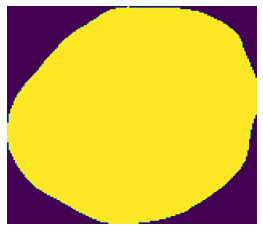

In [4]:
contour_mask = sc_obj.get_contour_mask()
plt.imshow(contour_mask)
plt.axis("off")

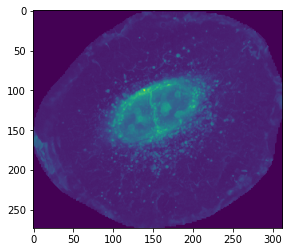

In [5]:
plt.imshow(sc_obj.get_contour_img())

In [6]:
feature_extractors.compute_haralick_features(sc_obj)
sc_obj.add_feature("haralick", feature_extractors.compute_haralick_features(sc_obj))

In [7]:
sc_obj.get_contour_mask().shape, sc_obj.get_img().shape

((273, 313), (2408, 2408))

In [8]:
skimage_features = feature_extractors.compute_skimage_regionprops(sc_obj)
sc_obj.add_feature("skimage", skimage_features)

In [9]:
import pandas as pd
from traitlets import Callable
traj.compute_features("haralick", feature_extractors.compute_haralick_features)
traj.compute_features("skimage", feature_extractors.compute_skimage_regionprops)

In [10]:
feature_table = None
for sc in traj:
    feature_series = sc_obj.get_feature_pd_series()
    if feature_table is None:
        feature_table = pd.DataFrame(feature_series, columns=[str(sc.timeframe)])
    else:
        feature_table[str(sc.timeframe)] = feature_series
feature_table = feature_table.transpose()

In [11]:
feature_table

,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,haralick_9,...,skimage_moments_weighted_normalized-2-2,skimage_moments_weighted_normalized-2-3,skimage_moments_weighted_normalized-3-0,skimage_moments_weighted_normalized-3-1,skimage_moments_weighted_normalized-3-2,skimage_moments_weighted_normalized-3-3,skimage_orientation,skimage_perimeter,skimage_perimeter_crofton,skimage_solidity
0,0.010583,36.621116,0.959178,448.460301,0.381752,58.107479,1757.220089,5.960719,8.618745,0.000747,...,0.000004,3.291273e-08,0.000003,-0.000001,3.769357e-09,-7.231657e-09,-1.17754,1014.523953,964.510537,0.990437
1,0.010583,36.621116,0.959178,448.460301,0.381752,58.107479,1757.220089,5.960719,8.618745,0.000747,...,0.000004,3.291273e-08,0.000003,-0.000001,3.769357e-09,-7.231657e-09,-1.17754,1014.523953,964.510537,0.990437
2,0.010583,36.621116,0.959178,448.460301,0.381752,58.107479,1757.220089,5.960719,8.618745,0.000747,...,0.000004,3.291273e-08,0.000003,-0.000001,3.769357e-09,-7.231657e-09,-1.17754,1014.523953,964.510537,0.990437
